About Dataset
Suppose we want to identify certain groups of facebook users based on their behavior. Some facebook users might react on posts nad some are not. Some users may 'like' react more and use other reactions like 'love' or 'wow' to a very minute extent. Some people may share posts a lot while some may not. Some only react and not comment on posts. Some may comment but react much, etc.

We are going to identify such groups with the help of machine learning.

We are going to use K-Means Clustering for this purpose. K-Means Clustering is the most popular algorithm which is used for unsupervised learning. This algorithm is used when we have un-labelled data.

In [25]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(path):
    return pd.read_excel(path)

In [3]:
!ls

Untitled.ipynb
users.xlsx
~$users.xlsx


In [4]:
users=load_data("users.xlsx")

In [5]:
users=pd.DataFrame(users)

In [6]:
users

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [7]:
#make a copy of data
data=users.copy()

In [8]:
data.shape

(7050, 9)

this dataset has 9 features.
lets check null values

In [9]:
data.isna().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [10]:
# description of data
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


we can analyse that all data are right skewed and we need to scale the data because the difference between min and max values are large.

### Scale the data

we use MinMaxScaler to scaling the data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mms=MinMaxScaler()

In [21]:
data_scaled=mms.fit_transform(data)

In [22]:
data_scaled=pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### Clustering of Dataset

Now, Its time to choose the no of clusters.
to find out right no of clusters we use to methods- Elbow Analysis and Silhouette Score

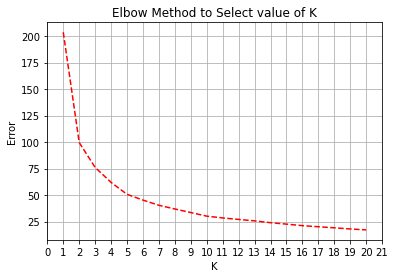

In [28]:
from sklearn.cluster import KMeans
k=[]
cost = []

for i in range(1, 21):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(data_scaled)
    k.append(i)
    cost.append(kmean.inertia_) 

plt.plot( k, pd.DataFrame(cost), 'r--')
plt.xlabel('K')
plt.xticks(range(22))
plt.ylabel("Error")
plt.title("Elbow Method to Select value of K")
plt.grid()
plt.show()

we can see that elbow is made at the value of 2, that means no of cluster will be 2.
To make sure about the no of cluster we use silhouette score.

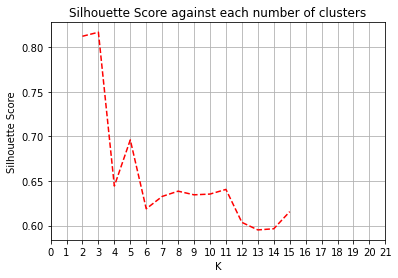

In [31]:
# Let's first import the relevant library
from sklearn.metrics import silhouette_score
k=[]
score = []

for i in range(2, 16):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(data_scaled)
    k.append(i)
    score.append(silhouette_score(data_scaled, kmean.labels_))

# Let's plot the Number of K's against Silhouette Score
plt.plot( k, pd.DataFrame(score), 'r--')
plt.xlabel('K')
plt.xticks(range(22))
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score against each number of clusters")
plt.grid()
plt.show()

we can see that here sillhouette score is high at 3. but in elbow analysis the cost at 3 is quite low but sillhouette score is high.
So we choose 3 no of cluster.

##  Train the model

In [36]:
kmean_3 = KMeans(n_clusters=3, random_state=0)
labels = kmean_3.fit_predict(data_scaled)

data['clusters'] = labels
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
0,529,512,262,432,92,3,1,1,0,2
1,150,0,0,150,0,0,0,0,0,2
2,227,236,57,204,21,1,1,0,0,2
3,111,0,0,111,0,0,0,0,0,2
4,213,0,0,204,9,0,0,0,0,2


## Profiling
This is used to understanding of what values are in those clusters are and interpret them. We can use profiling for data analysis to get insights.
Let's do this to find out the user behavior.

In [37]:
pivoted = data.groupby(['clusters']).median().reset_index()
pivoted

,clusters,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,1044.5,1955.5,541.5,839.0,164.5,5.0,7.0,1.0,1.0
1,1,1821.5,21.0,2.0,1810.0,0.0,0.0,0.0,0.0,0.0
2,2,48.0,3.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0


From the pivoted dataframe shown above, we can see that there are three groups of Facebook users:

1. Group 2: user of this group not use Facebook a lot. Their number of reactions are around 48 and comments only 3. They don't share a lot of posts. And mostly they use 'like' react on posts.
2. Group 1: user of this group use Facebook quite a lot. But they are the kind of people who usually give people the 'like' react mostly.
3. Group 0: users of this group also use Facebook a lot. These people tend to comment and share the posts a lot. They also tend to use other reacts on posts besides the 'like' react.


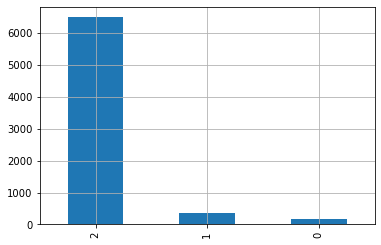

In [41]:
# No of people in each cluster
data.clusters.value_counts().plot(kind='bar')
plt.grid()
plt.show()

we can analyze that mostly people belong to Group 2.